In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import torch
from matplotlib import pyplot as plt

from util import MMD, median_distance
torch.manual_seed(987)
# device = 'cpu'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from cometitors import run_rkl_wgf
from cometitors import run_mmdgf

torch.Size([70000, 324])


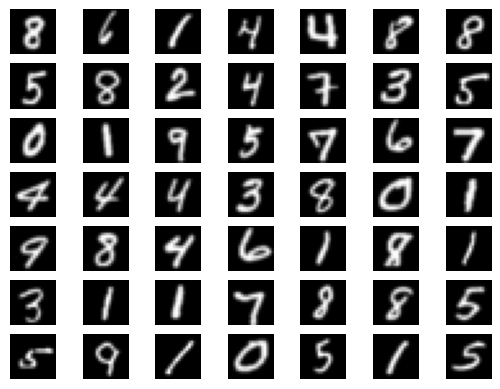

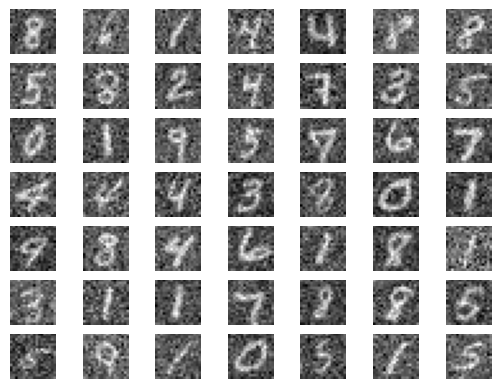

In [34]:
from torchvision import transforms
from IPython import display
from torch.utils.data import DataLoader
from sklearn.datasets import make_moons
from sklearn.datasets import make_s_curve
from traindenoisingsm import EnergyBasedModel
from traindenoisingsm import FlattenedCNN
from traindenoisingsm import train_energy_based_model


def load_mnist():
    X = torch.load("/content/drive/MyDrive/iNGD/mnist_data.pt")
    y = torch.load("/content/drive/MyDrive/iNGD/mnist_label.pt")

    return X, y

X, y = load_mnist()

image_size = 18
# reshape the data to 1x32x32
X = X.view(-1, 1, 32, 32)
resize_transform = transforms.Resize((image_size, image_size))
X = resize_transform(X)
X = X.view(-1, image_size * image_size).to(device)
print(X.shape)

xt = X[:200, :]
xt = xt + torch.randn_like(xt) * 0.2

torch.save(xt, '/content/drive/MyDrive/xt.pt')

for i in range(49):
    plt.subplot(7, 7, i + 1)
    image_i = X[i].view(image_size, image_size).cpu().numpy()
    plt.imshow(image_i, cmap='gray')
    plt.axis('off')

plt.show()

for i in range(49):
    plt.subplot(7, 7, i + 1)
    image_i = xt[i].view(image_size, image_size).cpu()
    plt.imshow(image_i, cmap='gray')
    plt.axis('off')
plt.show()


In [18]:
import os
def gendata(n = 200):
    # take a random sample from the X
    ret = X[torch.randint(0, X.shape[0], (n,)), :]
    return ret

model = EnergyBasedModel(image_size*image_size).to(device)

# if model does not exist, train
# if not os.path.exists('/content/drive/MyDrive/my_model.pth'):
x1 = gendata(n = 10000)
model.train()

X = x1.detach().clone()
dataloader = DataLoader(X, batch_size=777, shuffle=True)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
train_energy_based_model(model, dataloader, optimizer, sigma = .2, epochs=1003)
# torch.save(model.state_dict(), '/content/drive/MyDrive/my_model.pth')
# else:
  # model.load_state_dict(torch.load('/content/drive/MyDrive/my_model.pth'))

model.eval()


Epoch 1/1003, Loss: 24.8732
Epoch 2/1003, Loss: 22.9455
Epoch 3/1003, Loss: 17.5059
Epoch 4/1003, Loss: 13.5155
Epoch 5/1003, Loss: 11.2320
Epoch 6/1003, Loss: 9.8768
Epoch 7/1003, Loss: 8.9740
Epoch 8/1003, Loss: 8.2928
Epoch 9/1003, Loss: 7.6363
Epoch 10/1003, Loss: 7.1502
Epoch 11/1003, Loss: 6.7638
Epoch 12/1003, Loss: 6.4066
Epoch 13/1003, Loss: 6.0390
Epoch 14/1003, Loss: 5.7278
Epoch 15/1003, Loss: 5.5022
Epoch 16/1003, Loss: 5.2891
Epoch 17/1003, Loss: 5.1084
Epoch 18/1003, Loss: 4.9505
Epoch 19/1003, Loss: 4.8420
Epoch 20/1003, Loss: 4.7091
Epoch 21/1003, Loss: 4.5842
Epoch 22/1003, Loss: 4.5211
Epoch 23/1003, Loss: 4.4613
Epoch 24/1003, Loss: 4.3599
Epoch 25/1003, Loss: 4.2973
Epoch 26/1003, Loss: 4.2542
Epoch 27/1003, Loss: 4.2153
Epoch 28/1003, Loss: 4.1961
Epoch 29/1003, Loss: 4.1783
Epoch 30/1003, Loss: 4.1593
Epoch 31/1003, Loss: 4.1453
Epoch 32/1003, Loss: 4.1357
Epoch 33/1003, Loss: 4.1300
Epoch 34/1003, Loss: 4.1432
Epoch 35/1003, Loss: 4.1078
Epoch 36/1003, Loss: 4.1

EnergyBasedModel(
  (network): Sequential(
    (0): Linear(in_features=324, out_features=1024, bias=True)
    (1): SiLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): SiLU()
    (4): Linear(in_features=1024, out_features=211, bias=True)
    (5): SiLU()
    (6): Linear(in_features=211, out_features=1, bias=True)
  )
)

In [19]:
from run_tsm import run_ntkNGD
xt_ngd, xt_traj_ngd = run_ntkNGD(gendata, xt.clone(), None, 1e-2, None, 1000, 'ntkNGD', kern ='nn', kernmodel=model)
print("mmd: ", MMD(xt_ngd, X[:200, :], median_distance(xt)).item())


0 mmd:  0.2074909508228302
1 mmd:  0.20912180840969086
2 mmd:  0.2000812441110611
3 mmd:  0.20926925539970398
4 mmd:  0.21275198459625244
5 mmd:  0.19232207536697388
6 mmd:  0.20388227701187134
7 mmd:  0.2011989802122116
8 mmd:  0.19836211204528809
9 mmd:  0.2061185985803604
10 mmd:  0.19782185554504395
11 mmd:  0.21512944996356964
12 mmd:  0.18981380760669708
13 mmd:  0.19852040708065033
14 mmd:  0.18816322088241577
15 mmd:  0.18488667905330658
16 mmd:  0.18347115814685822
17 mmd:  0.18391568958759308
18 mmd:  0.1825656145811081
19 mmd:  0.18178331851959229
20 mmd:  0.17721430957317352
21 mmd:  0.1892315000295639
22 mmd:  0.17931975424289703
23 mmd:  0.1893044114112854
24 mmd:  0.182498499751091
25 mmd:  0.17367324233055115
26 mmd:  0.17517034709453583
27 mmd:  0.1725393831729889
28 mmd:  0.1741989105939865
29 mmd:  0.17236259579658508
30 mmd:  0.17435811460018158
31 mmd:  0.17092302441596985
32 mmd:  0.1658969223499298
33 mmd:  0.1725412756204605
34 mmd:  0.16724452376365662
35 mmd: 

mean:  tensor([-0.0011, -0.0305], device='cuda:0')
std:  tensor([0.8234, 1.4380], device='cuda:0')


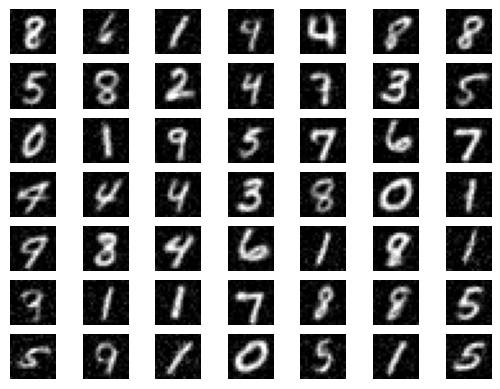

In [30]:
# save xt_ngd and xt_traj_ngd to folder
torch.save(xt_ngd, '/content/drive/MyDrive/xt_ngd.pt')
torch.save(xt_traj_ngd, '/content/drive/MyDrive/xt_traj_ngd.pt')

print("mean: ", torch.mean(xt, 0))
print("std: ", torch.std(xt, 0))
xt_ngd = torch.clamp(xt_ngd, 0, 1)
for i in range(49):
    plt.subplot(7, 7, i + 1)
    image_i = xt_ngd[i].view(image_size, image_size).cpu().numpy()
    plt.imshow(image_i, cmap='gray')
    plt.axis('off')
plt.show()


torch.Size([200, 324])
torch.Size([200, 324])
mmd:  0.17598305642604828
mmd:  0.17273151874542236
mmd:  0.17058826982975006
mmd:  0.1688614934682846
mmd:  0.1673232764005661
mmd:  0.1658327728509903
mmd:  0.16440293192863464
mmd:  0.1629950851202011
mmd:  0.16161426901817322
mmd:  0.16027027368545532
mmd:  0.15891754627227783
mmd:  0.15758326649665833
mmd:  0.15627002716064453
mmd:  0.15499603748321533
mmd:  0.15371070802211761
mmd:  0.15246382355690002
mmd:  0.15121354162693024
mmd:  0.1499687284231186
mmd:  0.14876079559326172
mmd:  0.14755448698997498
mmd:  0.14634066820144653
mmd:  0.1451438069343567
mmd:  0.14392085373401642
mmd:  0.1427346020936966
mmd:  0.1415727287530899
mmd:  0.14045153558254242
mmd:  0.13930806517601013
mmd:  0.13817863166332245
mmd:  0.1370590329170227
mmd:  0.13594138622283936
mmd:  0.13480675220489502
mmd:  0.13370104134082794
mmd:  0.13261646032333374
mmd:  0.1315530687570572
mmd:  0.13050155341625214
mmd:  0.12944288551807404
mmd:  0.12838663160800934
mm

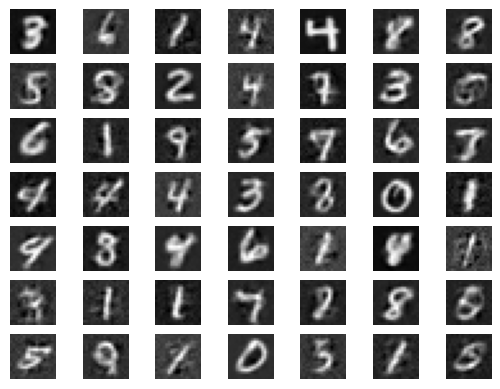

In [35]:

x1 = gendata(n = 10000)
x1 = x1.detach().clone()[-200:, :]
print(x1.shape)
print(x2.shape)
xt_wgf, xt_traj = run_rkl_wgf(x1, xt.clone(), eta = 10, niter=1000)
# xt_wgf, xt_traj = run_mmdgf(x1, xt.clone(), eta = 100, niter=1000)

# save xt_wgf and xt_traj to file
torch.save(xt_wgf, '/content/drive/MyDrive/xt_wgf.pt')
torch.save(xt_traj, '/content/drive/MyDrive/xt_traj_wgf.pt')

print("mean: ", torch.mean(xt, 0))
print("std: ", torch.std(xt, 0))

for i in range(49):
    plt.subplot(7, 7, i + 1)
    image_i = xt_wgf[i].view(image_size, image_size).cpu().numpy()
    plt.imshow(image_i, cmap='gray')
    plt.axis('off')
plt.show()


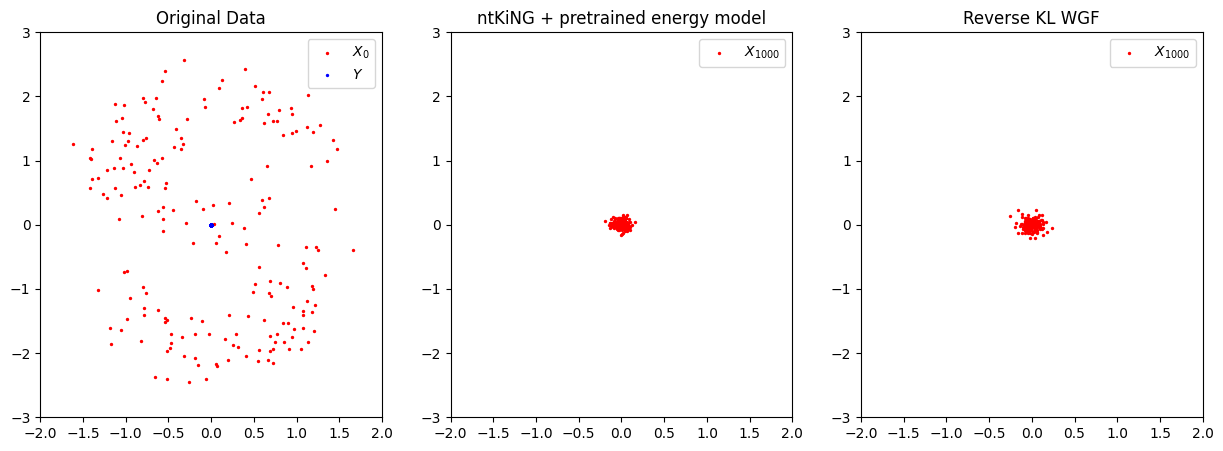

In [22]:

xt =  make_s_curve(n_samples= 200 , noise=0.01)[0][:, [0, 2]]
xt = torch.tensor(xt, dtype=torch.float32).to(device)
xt = xt + torch.randn_like(xt)*.3

# combine all results together in subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# original data
axs[0].scatter(xt[:, 0].cpu(), xt[:, 1].cpu(), c='r', s=2, label='$X_0$')
axs[0].scatter(x1[:, 0].cpu(), x1[:, 1].cpu(), c='b', s=2, label='$Y$')
axs[0].legend()
axs[0].set_title("Original Data")
axs[0].set_xlim(-2, 2)
axs[0].set_ylim(-3, 3)
# xt_ngd
# axs[1].scatter(x1[:, 0].cpu(), x1[:, 1].cpu(), c='b', s=2)
axs[1].scatter(xt_ngd[:, 0].cpu(), xt_ngd[:, 1].cpu(), c='r', s=2, label='$X_{1000}$')
axs[1].legend()
axs[1].set_title("ntKiNG + pretrained energy model")
axs[1].set_xlim(-2, 2)
axs[1].set_ylim(-3, 3)
# xt_wgf
# axs[2].scatter(x1[:, 0].cpu(), x1[:, 1].cpu(), c='b', s=2)
axs[2].scatter(xt_wgf[:, 0].cpu(), xt_wgf[:, 1].cpu(), c='r', s=2, label='$X_{1000}$')
axs[2].legend()
axs[2].set_title("Reverse KL WGF")
axs[2].set_xlim(-2, 2)
axs[2].set_ylim(-3, 3)
plt.show()